if running through need to remove xm for arrary and make sure hog values correct

In [1]:
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
import shapely.geometry
from shapely.geometry import Point
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import math
import os, sys

In [2]:
from skimage.feature import hog
from skimage import data, exposure

In [4]:
survey = "HI1521"

path = '..//..//..//Documents//Test_sets//Testing_Sample//HI1470//Edits//'

array = np.load(path + 'array10m//arraymin_1.npy')
arraySS = np.load(path + 'array10m//arraySS_1.npy')

geosurveyp = pd.read_csv(path + 'HI1470_1_EPSG3035')
ss = pd.read_csv(path+'HI1470_SS_1.csv')

breakdown = 1

In [5]:
step = 10
hogval = 5
savepath = '..//..//..//Documents//Test_sets//Testing_Sample//HOG_testsets_10m//oldmin//'

In [6]:
minx = geosurveyp['Xp'].min()
maxx = geosurveyp['Xp'].max()
rangex = maxx-minx

print (minx, maxx, rangex)

miny = geosurveyp['Yp'].min()
maxy = geosurveyp['Yp'].max()
rangey = maxy-miny

print ( miny, maxy, rangey)

minz = geosurveyp['Depth'].min()
maxz = geosurveyp['Depth'].max()

3159328.99003 3171579.81425 12250.8242201
3108449.72196 3116944.49097 8494.76900933


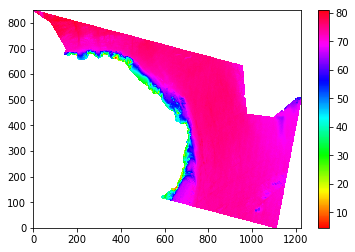

In [7]:
col = math.ceil(rangex/step)
row = math.ceil(rangey/step)

xi = np.arange(0, col)
yi = np.arange(0, row)
X, Y = np.meshgrid(xi, yi)
Z = array[Y,X]

import numpy.ma as ma
Lm = ma.masked_where(np.isnan(Z),Z)

plt.pcolor(X, Y, Lm, cmap='hsv', vmin=minz, vmax=maxz)
plt.colorbar()

plt.show()

In [8]:
#give nan values the value of the min - hog does not work with Nan
array[np.isnan(array)] = np.nanmin(array)
# xm = np.ma.masked_invalid(array)

/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


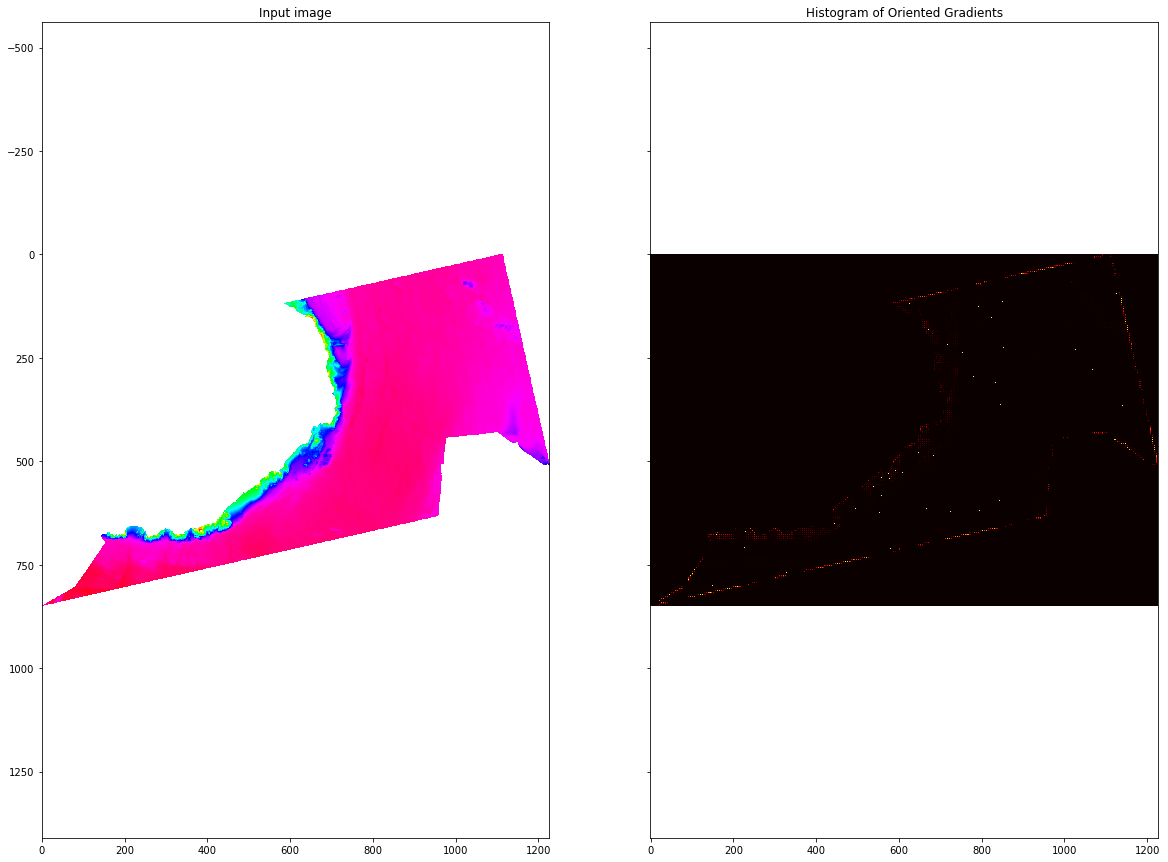

In [9]:
image = array

fd, hog_image = hog(image, orientations=4, pixels_per_cell=(hogval,hogval), cells_per_block=(1,1), visualise=True, feature_vector= False)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 15), sharex=True, sharey=True)
#moved up arraySS = np.load(path + 'array5m//arraySS.npy')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 100))

ax1.axis('on')
ax1.imshow(Lm, cmap=plt.cm.hsv)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

import numpy.ma as ma
Zm = ma.masked_equal(arraySS, 0)

ax2.axis('on')
im1 = ax2.imshow(hog_image_rescaled, cmap=plt.cm.hot)
im2 = ax2.imshow(Zm,cmap=plt.cm.Wistia)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
# ax = plt.gca()
# ax.invert_yaxis()
plt.savefig(path+'fig')
plt.show()


In [9]:
#plt.savefig(path+'fig')

In [10]:
fd.shape

(85, 122, 1, 1, 4)

In [11]:
# create dataframe for hog outpuy

HOG_output = pd.DataFrame()

In [12]:
#populate HOG_output dataframe. for now need to manually amend to put in the r and c values

for r in range(0,fd.shape[0]):
    for c in range(0,fd.shape[1]):
        for a in range(0,1):
            for b in range(0,1):
                row = [r,c,(fd[r][c][a][b][0]),(fd[r][c][a][b][1]),(fd[r][c][a][b][2]),(fd[r][c][a][b][3])]
                HOG_output = HOG_output.append([row])
                print (fd[r][c][a][b])

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.34207506  0.02918283  0.29412086  0.3345195 ]
[ 0.4478259   0.30618152  0.17340949  0.07240071]
[ 0.60151668  0.          0.10749792  0.29089656]
[ 0.43395635  0.26326063  0.07412185  0.22859477]
[ 0.28508615  0.14693656  0.3952846   0.17258451]
[ 0.06943412  0.35245282

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.11926861  0.132568    0.47209827  0.275968  ]
[ 0.18214448  0.2201935   0.51115127  0.08638595]
[ 0.11828725  0.28048976  0.51063132  0.0904878 ]
[ 0.24095445  0.22124794  0.37935926  0.1583237 ]
[ 0.53330539  0.08850497  0.05908548  0.31901215]
[ 0.3620637   0.09091626  0.30011539  0.24681477]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  n

[ 0.44292333  0.16252729  0.09517016  0.29935123]
[ 0.51255164  0.19611501  0.20963159  0.08166503]
[ 0.31127827  0.06368688  0.21395104  0.41105179]
[ 0.0442282   0.09837682  0.16468419  0.69265445]
[ 0.15004049  0.09358425  0.63576911  0.12053709]
[ 0.19909522  0.55546218  0.13414458  0.11124303]
[ 0.14389862  0.52158101  0.02836276  0.30609244]
[ 0.39976972  0.28508292  0.00799534  0.30707018]
[ 0.14812484  0.04437376  0.          0.8074657 ]
[ 0.17443315  0.00631045  0.1432784   0.67593196]
[ 0.36154423  0.14300946  0.05789193  0.43749665]
[ 0.06302181  0.09618446  0.64451025  0.19621594]
[ 0.0755536   0.          0.51859603  0.40579253]
[ 0.32634236  0.11812962  0.11817183  0.43726859]
[ 0.43421705  0.3153001   0.          0.25039342]
[ 0.26767204  0.27282435  0.07608133  0.38325612]
[ 0.18192949  0.27796882  0.31790402  0.22209438]
[ 0.31645547  0.2025935   0.07728741  0.40353918]
[ 0.50221216  0.10464376  0.07588664  0.31707852]
[ 0.13944328  0.38502376  0.23917301  0.23621953]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.07388795  0.48194189  0.44416762  0.        ]
[ 0.          0.          0.19392267  0.80607512

[ 0.28365362  0.55175361  0.05776935  0.10678809]
[ 0.4827908   0.09861351  0.10501616  0.31351135]
[ 0.14344749  0.34231353  0.23382965  0.28036911]
[ 0.5538949   0.          0.07897204  0.36707977]
[ 0.05510312  0.6904977   0.17237123  0.08199594]
[ 0.          0.5612668   0.27068925  0.16802636]
[ 0.16398075  0.51930703  0.27952785  0.03716087]
[ 0.20432554  0.34243716  0.38821122  0.06499445]
[ 0.24547808  0.05224834  0.33171018  0.37054249]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.1330914   0.          0.02598721  0.84091945]
[ 0.          0.          0.88938636  0.11060584]
[ 0.55965729  0.          0.28833621  0.1519928 ]
[ 0.3387279   0.52040699  0.1161027   0.02474673]
[ 0.          0.99998802  0.          0.        ]
[ 0.06784785  0.79912435  0.10268695  0.03032764]
[ 0.84463224  0.          0.          0.15535945]
[ 0.46173655  0.          0.          0.53824229]
[ 0.27021421  0.01596535  0.57131199  0.14243648]
[ 0.77097334  0.01860972  0.          0.21034948]
[ 0.20505331  0.21805601  0.20011256  0.37670438]
[ 0.42606886  0.28372567  0.07315028  0.21693077]
[ 0.39948408  0.23554319  0.12181441  0.24308177]
[ 0.22741857  0.30301405  0.14946698  0.32000708]
[ 0.12349555  0.21937006  0.45941107  0.19753092]
[ 0.14900929  0.23134683  0.35663957  0.26291212]
[ 0.08294865  0.1714264   0.39130345  0.35424119]
[ 0.12226705  0.14826398  0.19309584  0.53630634]
[ 0.10551034  0.28671467  0.354715

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.04798938  0.04065253  0.50135902  0.40991799]
[ 0.28880665  0.3826153   0.20420799  0.1242489 ]
[ 0.06713319  0.51159094  0.13925511  0.28192173]
[ 0.10389044  0.11605618  0.60440734  0.1755435 ]
[ 0.10679126  0.08190425  0.44335113  0.36782104]
[ 0.52981134  0.07407349  0.12880026  0.26723181]
[ 0.33476792  0.07123046  0.33101816  0.26287356]
[ 0.24674724  0.26192378  0.13516714  0.35603707]
[ 0.23467205  0.098454    0.25489029  0.41185682]
[ 0.20323221  0.23097791  0.2879438   0.27770166]
[ 0.32289231  0.00882404  0.41382198  0.25438696]
[ 0.33806224  0.2930784   0.09062742  0.27807858]
[ 0.16808543  0.06547583  0.16562247  0.60073073]
[ 0.41978849  0.12342505  0.30469111  0.1519948 ]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  na

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.06124578  0.33319822  0.13871293  0.46683646]
[ 0.          0.06900021  0.18093782  0.75005731]
[ 0.15865555  0.51666972  0.26014405  0.06452615]
[ 0.16941859  0.12471111  0.52284504  0.18301801]
[ 0.29435081  0.52908552  0.09101279  0.08554133]
[ 0.99999377  0.          0.          0.        ]
[ 0.961145   0.         0.         0.0388314]
[ 0.43849184  0.06473897  0.03720672  0.4595134 ]
[ 0.62575725  0.16984445  0.          0.20435541]
[ 0.74524718  0.02724375  0.05045438  0.17701616]
[ 0.6487147   0.04094454  0.22750818  0.08278685]
[ 0.23575362  0.19845954  0.21519768  0.35048009]
[ 0.2568124   0.13835622  0.14341771  0.46132373]
[ 0.10405709  0.0369079   0.59598105  0.26297958]
[ 0.30797895  0.04810675  0.199588    0.44428162]
[ 0.22293294  0.056774    0.18634431  0.53384499]
[ 0.09851616  0.20017632  0.43992516  0.26129649]
[ 0.18703134  0.25167784  0.49790878  0.0632

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.26247372  0.18710957  0.13774899  0.41253698]
[ 0.2463423   0.14653192  0.35395037  0.25306074]
[ 0.4536694   0.01430376  0.21160389  0.32032965]
[ 0.28608     0.04081299  0.13988033  0.53306349]
[ 0.47656718  0.27296109  0.09876223  0.15160032]
[ 0.38593538  0.35222645  0.11439228  0.14730052]
[ 0.22622775  0.03778042  0.10721661  0.62865666]
[ 0.43739564  0.27421447  0.08203609  0.20618308]
[ 0.39347794  0.08334338  0.26627519  0.25677931]
[ 0.29113736  0.03642771  0.15229818  0.52001481]
[ 0.39524507  0.28270491  0.02925985  0.29271467]
[ 0.07228643  0.41061944  0.30852456  0.20845236]
[ 0.44486098  0.09432545  0.34753     0.1131642 ]
[ 0.5233509   0.1668065   0.          0.30976364]
[ 0.28796006  0.          0.1013875   0.6105705 ]
[ 0.41030529  0.16147707  0.19139841  0.23663747]
[ 0.55482875  0.24111961  0.          0.20388546]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  n

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.65415255  0.          0.          0.3458432 ]
[ 0.84762209  0.15236351  0.          0.        ]
[ 0.77520827  0.16715444  0.          0.05761758]
[ 0.71937552  0.02238939  0.        

[ 0.55888731  0.08779749  0.11987549  0.23335873]
[ 0.77917291  0.          0.          0.2207863 ]
[ 0.47424604  0.19077532  0.22527659  0.10960662]
[ 0.29526706  0.          0.          0.70464778]
[ 0.68482482  0.          0.          0.31512968]
[ 0.14041793  0.13844209  0.34050282  0.3804783 ]
[ 0.2642874  0.2734757  0.4320748  0.0300212]
[ 0.19090895  0.42823589  0.14411715  0.23652859]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.7455583  0.2544383  0.         0.       ]
[ 0.67277417  0.05199116  0.0572978   0.21792794]
[ 0.68640744  0.06009958  0.          0.25347705]
[ 0.8948124   0.          0.          0.10516187]
[ 0.68127372  0.17428801  0.06626151  0.07813687]
[ 0.29863892  0.10923345  0.25937936  0.33258946]
[ 0.27762891  0.23134963  0.08076057  0.41013961]
[ 0.37336341  0.31205255  0.06302023  0.2514069 ]
[ 0.17894459  0.40365028  0.16709837  0.25014698]
[ 0.0364655   0.14393147  0.45108758  0.36839892]
[ 0.21250991  0.118196    0.21715971  0.45206751]
[ 0.28878128  0.29010244  0.09529177  0.32571305]
[ 0.51666244  0.18304853  0.0140822   0.28610444]
[ 0.62563552  0.19213612  0.07910003  0.10305124]
[ 0.16565458  0.14098823  0.27923228  0.41398673]
[ 0.25411418  0.33295588  0.25053313  0.16226591]
[ 0.21387693  0.00820949  0.27862985  0.49919273]
[ 0.13780232  0.494904

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.1997702   0.37941587  0.33954918  0.08118613]
[ 0.14812328  0.28898259  0.43138142  0.13142196]
[ 0.10425205  0.28476565  0.27140483  0.33945282]
[ 0.79091406  0.20902403  0.          0.        ]
[ 0.04412007  0.412901    0.54291545  0.        ]
[ 0.0414255   0.          0.49750981  0.46098064]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  n

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.16634023  0.46969201  0.26279547  0.1011675 ]
[ 0.34703464  0.43602099  0.17603742  0.04090226]
[ 0.41213547  0.44261874  0.10419305  0.04104463]
[ 0.28243974  0.20486796  0.22883808  0.28383976]
[ 0.25308032  0.29506227  0.07459842  0.37724769]
[ 0.29457812  0.20840941  0.23021994  0.2667847 ]
[ 0.99253424  0.0074591   0.          0.        ]
[ 0.13282386  0.43239246  0.0658998   0.36887631]
[ 0.18795272  0.1848751   0.5266496   0.10051473]
[ 0.46517237  0.          0.          0.53481566]
[ 0.97351083  0.02645684  0.          0.        ]
[ 0.38232509  0.44690556  0.09483112  0.07584409]
[ 0.44603099  0.12167087  0.02880874  0.4033968 ]
[ 0.54094956  0.21756705  0.04969734  0.19171378]
[ 0.25982835  0.19574288  0.23134309  0.31295288]
[ 0.2045315   0.38750396  0.10118245  0.30661888]
[ 0.06312346  0.28573213  0.56651915  0.084512

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.32364925  0.1523021   0.16139839  0.36254607]
[ 0.40585769  0.08010793  0.02364351  0.49027813]
[ 0.47464713  0.          0.37995093  0.14523882]
[ 0.21395661  0.31257431  0.27897712  0.19436904]
[ 0.24627164  0.36012312  0.13348534  0.2600159 ]
[ 0.4504394   0.28792743  0.0404292   0.22106552]
[ 0.65154992  0.18169254  0.06619492  0.10049396]
[ 0.2370051   0.20604676  0.38209088  0.17477201]
[ 0.33170168  0.23397187  0.39458629  0.03964589]
[ 0.51614816  0.          0.05404377  0.42973827]
[ 0.44541255  0.20045029  0.17304341  0.18102663]
[ 0.36495237  0.15767363  0.          0.47734631]
[ 0.28466728  0.02354171  0.39401749  0.29774937]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.24087114  0.37733066  0.17480332  0.20699242]
[ 0.392096    0.02920115  0.12269164  0.45600537]
[ 0.61681791  0.17058713  0.          0.21259222]
[ 0.05907254  0.72106285  0.21985945  0.        ]
[ 0.06509806  0.85553847  0.07935813  0.        ]
[ 0.4184521   0.56144549  0.02007136  0.        ]
[ 0.52845506  0.47152183  0.          0.        ]
[ 0.27242498  0.69895354  0.0212374   0.00735532]
[ 0.17372812  0.37802013  0.07448411  0.37375056]
[ 0.23772073  0.38727061  0.33904405  0.03593537]
[ 0.10071217  0.87829648  0.          0.02093015]
[ 0.03509407  0.24476339  0.42744235  0.29265037]
[ 0.5780269   0.18971546  0.10269614  0.12953296]
[ 0.4140944   0.4926

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.          0.18769041  0.49825406  0.31393207]
[ 0.21989742  0.34506989  0.21446162  0.22042714]
[ 0.34778819  0.24765365  0.18563504  0.21873811]
[ 0.11706349  0.2749344   0.52178633  0.08612816]
[ 0.39933588  0.28755839  0.22019735  0.09278646]
[ 0.27300107  0.37283772  0.3540584   0.        ]
[ 0.39906006  0.01620785  0.34069144  0.24388103]
[ 0.31206527  0.35794204  0.26010842  0.06977266]
[ 0.56827869  0.05035541  0.18471844  0.19653804]
[ 0.26784237  0.05661404  0.20850492  0.46692044]
[ 0.36760387  0.10441573  0.11828426  0.40954994]
[ 0.22318058  0.02534792  0.26984235  0.48153264]
[ 0.49744688  0.26556952  0.05029986  0.18654449]
[ 0.17047181  0.36351521  0.34715782  0.11865074]
[ 0.10259614  0.26095699  0.01373471  0.62261221]
[ 0.17426205  0.15482068  0.30818904  0.36255614]
[ 0.03248395  0.11217297  0.58314117  0.27201483]
[ 0.22075091  0.15167544  0.38647724  0.24096591]
[ 0.54539293  0.24695416  0.10227971  0.10529382]
[ 0.33336873  0.24124393  0.3089917   0.11622831]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.33176688  0.27469177  0.0877141   0.30582331]
[ 0.02971227  0.          0.76399437  0.20629141]
[ 0.05315755  0.01723958  0.43737723  0.49222262]
[ 0.13764591  0.86234587  0.          0.        ]
[ 0.07226773  0.88773748  0.03998394  0.        ]
[ 0.51622206  0.48376833  0.          0.        ]
[ 0.47422718  0.41969759  0.10596224  0.        ]
[ 0.1448528   0.85505604  0.      

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ 0.0803976   0.72347873  0.19612016  0.        ]
[ 0.          0.50748283  0.42270551  0.06980757]
[ 0.32255508  0.63548858  0.04194952  0.        ]
[ 0.          0.16565049  0.67927534  0.15506428]
[ 0.          0.69573718  0.30087864  0.00337922]
[ 0.00927298  0.04740844  0.86528677  0.07802203]
[ 0.22505325  0.74276708  0.03216798  0.        ]
[ 0.          0.92313841  0.07681088  0.        ]
[ 0.09511958  0.59572653  0.08921157  0.21985081]
[ 0.26106297  0.15461859  0.27739224  0.30684297]
[ 0.52414016  0.          0.04119299  0.43460328]
[ 0.          0.21515515  0.51382725  0.27090765]
[ 0.34609051  0.51064279  0.03348145  0.10969393]
[ 0.09562863  0.13427904  0.10241679  0.667595  ]
[ 0.6596887   0.0881234   0.08031779  0.17174924]
[ 0.11308593  0.21702038  0.4357191   0.23399207]
[ 0.41010741  0.15379638  0.14738328  0.2885629 ]
[ 0.28649436  0.37042511  0.32109518  0.02184683]
[ 0.1204564   0.53385076  0.31712053  0.02846592]
[ 0.04774494  0.03300393  0.51023479  0.40889815]


[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.07122721  0.07087636  0.6163992   0.24142155]
[ 0.          0.38271491  0.33949246  0.27772862]
[ 0.0383345   0.07815512  0.53637531  0.34708833]
[ 0.          0.24642775  0.66450847  0.08902233]
[ 0.59836245  0.13338018  0.09540041  0.17279584]
[ 0.12064933  0.11707917  0.54422858  0.217958

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ 0.02393695  0.17915425  0.71029719  0.08655378]
[ 0.07697175  0.14241233  0.39268965  0.38787185]
[ 0.21808855  0.14922356  0.16319694  0.4694371 ]
[ 0.25988502  0.18736277  0.36621066  0.186474  ]
[ 0.          0.07623459  0.69226892  0.23145222]
[ 0.          0.12131737  0.79469354  0.08393848]
[ 0.04611667  0.03822389  0.60994444  0.30567854]
[ 0.17173084  0.20403254  0.50732778  0.11685035]
[ 0.33290641  0.16835192  0.          0.49870875]
[ 0.12846442  0.23407783  0.18236757  0.45502901]
[ 0.14352921  0.37470845  0.16667918  0.31501715]
[ 0.62196171  0.16488356  0.0847094   0.12839922]
[ 0.24308133  0.30079043  0.17556644  0.28046841]
[ 0.2308546   0.32155302  0.23785339  0.20965639]
[ 0.16671776  0.65156488  0.14449459  0.03714394]
[ 0.          0.50492385  0.24767553  0.24736055]
[ 0.47728716  0.36183059

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan  nan  nan]
[ nan  nan

In [13]:
HOG_output.columns = ['R', 'C','1','2','3','4']
HOG_output.head()

# HOG_output.columns = ['R', 'C','0','45','90','135']
# HOG_output.head()

,R,C,1,2,3,4
0,0,0,NaN,NaN,NaN,NaN
0,0,1,NaN,NaN,NaN,NaN
0,0,2,NaN,NaN,NaN,NaN
0,0,3,NaN,NaN,NaN,NaN
0,0,4,NaN,NaN,NaN,NaN


In [14]:
#HOG_output back to geographical
# times 5 because 5 pixels per cell

stepxhog = step *hogval
stepyhog = step *hogval
        
HOG_output['XA'] = minx + (HOG_output['C']*stepxhog)
HOG_output['XB'] = minx + ((HOG_output['C']+1)*stepxhog)
HOG_output['YA'] = miny + (HOG_output['R']*stepyhog)
HOG_output['YB'] = miny + ((HOG_output['R']+1)*stepyhog)
HOG_output['midX'] = (HOG_output['XA']+HOG_output['XB'])/2
HOG_output['midY'] =(HOG_output['YA']+HOG_output['YB'])/2

In [15]:
#plot using geopands

geometry = [Point(xy) for xy in zip(HOG_output.midX, HOG_output.midY)]
crs = {'init': 'epsg:3035'}
HOGgeo = gpd.GeoDataFrame(HOG_output, crs=crs, geometry=geometry)

In [16]:
# HOGgeo.plot(column='90',cmap='OrRd')
# plt.show()

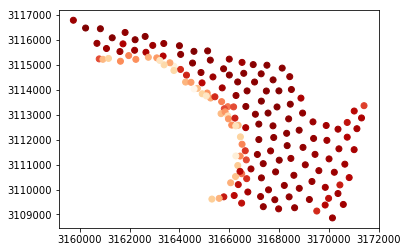

In [17]:
geometry = [Point(xy) for xy in zip(ss.X, ss.Y)]
crs = {'init': 'epsg:4326'}
ss = gpd.GeoDataFrame(ss, crs=crs, geometry=geometry)

#convert to 3035
ss = ss.to_crs({'init': 'epsg:3035'})

ss['Xp']= ss.geometry.apply(lambda p: p.x)
ss['Yp'] = ss.geometry.apply(lambda p: p.y)

ss.plot(column='Depth',cmap='OrRd')
plt.show()

In [18]:
#finding the grid square each sounding in ss is in, saving these hit locations to location

ss['NearestC'] =(ss['Xp'] - minx) /stepxhog
ss['NearestR'] =(ss['Yp'] - miny) /stepyhog

locations = ss.loc[:,['NearestC','NearestR']]

In [19]:
locations.head()

,NearestC,NearestR
0,59.115631,67.446022
1,76.887893,58.659341
2,66.756109,61.462667
3,51.989074,66.277553
4,47.157147,63.711447


In [20]:
floored_locations= locations.apply(np.floor)

In [21]:
floored_locations.head()

,NearestC,NearestR
0,59.0,67.0
1,76.0,58.0
2,66.0,61.0
3,51.0,66.0
4,47.0,63.0


In [22]:
#create a test dataset which has the nearest 25 cells
#this is the old method - gives all 4 of the directions
positives = pd.DataFrame()

for i in range(0,len(floored_locations)):
    fC = floored_locations.iloc[i][0]
    fR = floored_locations.iloc[i][1]
    
    A = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())

    B1 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    B2 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B3 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B4 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    B5 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    B6 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    B7 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    B8 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    C1 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    C2 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    C3 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C4 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C5 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C6 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C7 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC+2))].loc[:,['1','2','3','4']].values.flatten())
    C8 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC+1))].loc[:,['1','2','3','4']].values.flatten())
    C9 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == fC)].loc[:,['1','2','3','4']].values.flatten())
    C10 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    C11 = list(HOG_output[(HOG_output['R'] == (fR+2)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C12 = list(HOG_output[(HOG_output['R'] == (fR+1)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C13 = list(HOG_output[(HOG_output['R'] == fR) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C14 = list(HOG_output[(HOG_output['R'] == (fR-1)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C15 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC-2))].loc[:,['1','2','3','4']].values.flatten())
    C16 = list(HOG_output[(HOG_output['R'] == (fR-2)) & (HOG_output['C'] == (fC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    
    
    row = A +B1 + B2 + B3 + B4 + B5 + B6 + B7 + B8 + C1 + C2 + C3+ C4 + C5 + C6 + C7 + C8 + C9 + C10 + C11 + C12 + C13 + C14 + C15 + C16

    positives = positives.append([row])

In [23]:
o = positives.isnull().sum().sum()

In [24]:
if o > 0:
    #convert nans to 0
    positives = positives.fillna(0)

In [25]:
positives['Selection']=1

In [26]:
positives

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Selection
0,0.235239,0.268219,0.464263,0.032160,0.387159,0.016135,0.141957,0.454590,0.231722,0.366675,...,0.184542,0.620654,0.241770,0.040766,0.096691,0.173531,0.529211,0.090295,0.206798,1
0,0.281721,0.205258,0.067771,0.445112,0.248254,0.095633,0.302912,0.353051,0.247251,0.254392,...,0.407672,0.384762,0.104899,0.124365,0.385791,0.130596,0.234089,0.325931,0.309213,1
0,0.117063,0.274934,0.521786,0.086128,0.149919,0.247702,0.313178,0.289069,0.274689,0.369048,...,0.170054,0.181533,0.106574,0.212721,0.499023,0.282764,0.344484,0.137836,0.234732,1
0,0.053894,0.635634,0.237724,0.072577,0.045179,0.837489,0.117241,0.000000,0.171825,0.360985,...,0.000000,0.474227,0.419698,0.105962,0.000000,0.144853,0.855056,0.000000,0.000000,1
0,0.042645,0.957345,0.000000,0.000000,0.000000,0.941116,0.058875,0.000000,0.904182,0.059138,...,0.447724,0.164544,0.637109,0.198333,0.000000,0.000000,0.975404,0.000000,0.024583,1
0,0.527267,0.472726,0.000000,0.000000,0.056456,0.943539,0.000000,0.000000,0.000000,0.999994,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999984,0.000000,0.000000,1
0,0.267831,0.217804,0.494003,0.020145,0.051400,0.183705,0.562609,0.202186,0.402050,0.411038,...,0.048341,0.000000,0.741068,0.136911,0.121995,0.000000,0.971770,0.000000,0.028206,1
0,0.313021,0.231416,0.198170,0.257313,0.256641,0.000000,0.126846,0.616435,0.235634,0.701671,...,0.000000,0.162893,0.666772,0.098718,0.071593,0.456744,0.457013,0.086205,0.000000,1
0,0.035094,0.244763,0.427442,0.292650,0.285677,0.213544,0.289781,0.210947,0.272012,0.074706,...,0.093671,0.267001,0.142056,0.088255,0.502679,0.559019,0.100737,0.223981,0.116248,1
0,0.000000,0.770239,0.135430,0.094293,0.430661,0.569327,0.000000,0.000000,0.611990,0.302472,...,0.102721,0.392096,0.029201,0.122692,0.456005,0.616818,0.170587,0.000000,0.212592,1


In [27]:
positives.to_csv(savepath+"HOGpositives_"+survey+"_25_"+str(step)+"m_o4p"+str(hogval)+"b1_"+str(breakdown)+".csv")

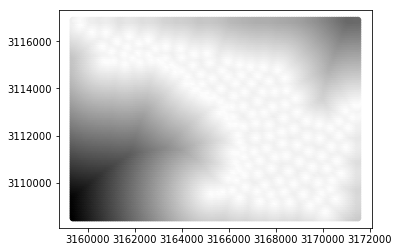

In [28]:
HOGgeo['distoss'] = HOGgeo.geometry.apply(lambda g: ss.distance(g).min())
HOGgeo.plot(column='distoss',cmap='binary')
plt.show()

In [29]:
negatives = pd.DataFrame()

In [30]:
HOGgeo.head()

,R,C,1,2,3,4,XA,XB,YA,YB,midX,midY,geometry,distoss
0,0,0,NaN,NaN,NaN,NaN,3.159329e+06,3.159429e+06,3.108450e+06,3.108550e+06,3.159379e+06,3.108500e+06,POINT (3159378.990025371 3108499.721963901),6030.688137
0,0,1,NaN,NaN,NaN,NaN,3.159429e+06,3.159529e+06,3.108450e+06,3.108550e+06,3.159479e+06,3.108500e+06,POINT (3159478.990025371 3108499.721963901),5932.448910
0,0,2,NaN,NaN,NaN,NaN,3.159529e+06,3.159629e+06,3.108450e+06,3.108550e+06,3.159579e+06,3.108500e+06,POINT (3159578.990025371 3108499.721963901),5834.269511
0,0,3,NaN,NaN,NaN,NaN,3.159629e+06,3.159729e+06,3.108450e+06,3.108550e+06,3.159679e+06,3.108500e+06,POINT (3159678.990025371 3108499.721963901),5736.153013
0,0,4,NaN,NaN,NaN,NaN,3.159729e+06,3.159829e+06,3.108450e+06,3.108550e+06,3.159779e+06,3.108500e+06,POINT (3159778.990025371 3108499.721963901),5638.102699


In [31]:
potential_neg = HOGgeo[(HOGgeo.distoss> 80) & (HOGgeo.distoss< 600)]
#was 100 to 12000

In [32]:
len(potential_neg)

4616

In [33]:
potential_neg

,R,C,1,2,3,4,XA,XB,YA,YB,midX,midY,geometry,distoss
0,0,103,NaN,NaN,NaN,NaN,3.169629e+06,3.169729e+06,3.108450e+06,3.108550e+06,3.169679e+06,3.108500e+06,POINT (3169678.990025371 3108499.721963901),588.447342
0,0,104,NaN,NaN,NaN,NaN,3.169729e+06,3.169829e+06,3.108450e+06,3.108550e+06,3.169779e+06,3.108500e+06,POINT (3169778.990025371 3108499.721963901),513.162649
0,0,105,NaN,NaN,NaN,NaN,3.169829e+06,3.169929e+06,3.108450e+06,3.108550e+06,3.169879e+06,3.108500e+06,POINT (3169878.990025371 3108499.721963901),447.662299
0,0,106,NaN,NaN,NaN,NaN,3.169929e+06,3.170029e+06,3.108450e+06,3.108550e+06,3.169979e+06,3.108500e+06,POINT (3169978.990025371 3108499.721963901),396.821324
0,0,107,NaN,NaN,NaN,NaN,3.170029e+06,3.170129e+06,3.108450e+06,3.108550e+06,3.170079e+06,3.108500e+06,POINT (3170078.990025371 3108499.721963901),366.787122
0,0,108,NaN,NaN,NaN,NaN,3.170129e+06,3.170229e+06,3.108450e+06,3.108550e+06,3.170179e+06,3.108500e+06,POINT (3170178.990025371 3108499.721963901),362.764969
0,0,109,NaN,NaN,NaN,NaN,3.170229e+06,3.170329e+06,3.108450e+06,3.108550e+06,3.170279e+06,3.108500e+06,POINT (3170278.990025371 3108499.721963901),385.569776
0,0,110,NaN,NaN,NaN,NaN,3.170329e+06,3.170429e+06,3.108450e+06,3.108550e+06,3.170379e+06,3.108500e+06,POINT (3170378.990025371 3108499.721963901),430.963667
0,0,111,NaN,NaN,NaN,NaN,3.170429e+06,3.170529e+06,3.108450e+06,3.108550e+06,3.170479e+06,3.108500e+06,POINT (3170478.990025371 3108499.721963901),492.742642
0,0,112,NaN,NaN,NaN,NaN,3.170529e+06,3.170629e+06,3.108450e+06,3.108550e+06,3.170579e+06,3.108500e+06,POINT (3170578.990025371 3108499.721963901),565.562500


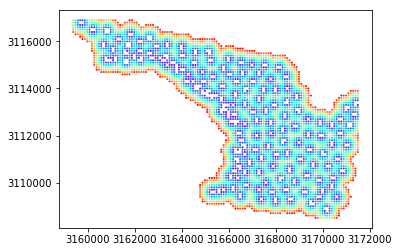

In [34]:
potential_neg.plot( column='distoss',cmap='rainbow',markersize=1)
plt.show()

In [35]:
 #reset indexes
potential_neg.reset_index(drop=True, inplace=True)  

In [36]:
len(potential_neg)

4616

In [37]:
negs = int(len(ss)*1.2)
print (negs)

198


In [38]:
from random import randint
t=[randint(0,len(potential_neg)) for p in range(0,negs)]
print (len(t))

198


In [39]:
# select the rows at these indexes (t)
tempdf = pd.DataFrame()
for i in t:
    tempdf = tempdf.append(potential_neg.iloc[i])

In [40]:
tempdf

,1,2,3,4,C,R,XA,XB,YA,YB,distoss,geometry,midX,midY
989,0.555992,0.086372,0.066114,0.291414,106.0,19.0,3.169929e+06,3.170029e+06,3.110350e+06,3.110450e+06,335.090765,POINT (3169978.990025371 3110399.721963901),3.169979e+06,3.110400e+06
2556,0.382325,0.446906,0.094831,0.075844,72.0,48.0,3.166529e+06,3.166629e+06,3.113250e+06,3.113350e+06,95.081857,POINT (3166578.990025371 3113299.721963901),3.166579e+06,3.113300e+06
2780,0.335566,0.256163,0.152652,0.255457,70.0,52.0,3.166329e+06,3.166429e+06,3.113650e+06,3.113750e+06,129.904539,POINT (3166378.990025371 3113699.721963901),3.166379e+06,3.113700e+06
1645,NaN,NaN,NaN,NaN,70.0,32.0,3.166329e+06,3.166429e+06,3.111650e+06,3.111750e+06,180.759089,POINT (3166378.990025371 3111699.721963901),3.166379e+06,3.111700e+06
3412,NaN,NaN,NaN,NaN,40.0,63.0,3.163329e+06,3.163429e+06,3.114750e+06,3.114850e+06,205.666521,POINT (3163378.990025371 3114799.721963901),3.163379e+06,3.114800e+06
2438,0.705514,0.133863,0.000000,0.160610,70.0,46.0,3.166329e+06,3.166429e+06,3.113050e+06,3.113150e+06,276.062526,POINT (3166378.990025371 3113099.721963901),3.166379e+06,3.113100e+06
1569,0.348797,0.110509,0.116199,0.424392,103.0,30.0,3.169629e+06,3.169729e+06,3.111450e+06,3.111550e+06,250.217615,POINT (3169678.990025371 3111499.721963901),3.169679e+06,3.111500e+06
2149,0.339778,0.122223,0.282260,0.255568,79.0,41.0,3.167229e+06,3.167329e+06,3.112550e+06,3.112650e+06,94.653751,POINT (3167278.990025371 3112599.721963901),3.167279e+06,3.112600e+06
4031,0.020232,0.116924,0.484754,0.378017,47.0,71.0,3.164029e+06,3.164129e+06,3.115550e+06,3.115650e+06,178.230076,POINT (3164078.990025371 3115599.721963901),3.164079e+06,3.115600e+06
507,0.067104,0.163644,0.289625,0.479500,87.0,11.0,3.168029e+06,3.168129e+06,3.109550e+06,3.109650e+06,248.584244,POINT (3168078.990025371 3109599.721963901),3.168079e+06,3.109600e+06


In [41]:
negloc = tempdf.loc[:,['C','R']]
print(negloc)

          C     R
989   106.0  19.0
2556   72.0  48.0
2780   70.0  52.0
1645   70.0  32.0
3412   40.0  63.0
2438   70.0  46.0
1569  103.0  30.0
2149   79.0  41.0
4031   47.0  71.0
507    87.0  11.0
1193   94.0  23.0
1634  114.0  31.0
2364  115.0  44.0
4410   34.0  78.0
3635   17.0  66.0
4118   69.0  72.0
1517  107.0  29.0
1386   77.0  27.0
3324   35.0  62.0
901    74.0  18.0
4514   13.0  81.0
202    83.0   6.0
2252   61.0  43.0
4245   25.0  75.0
4169   62.0  73.0
3787   23.0  68.0
3584   49.0  65.0
4556   18.0  82.0
3894   59.0  69.0
677    80.0  14.0
...     ...   ...
1188   89.0  23.0
4018   34.0  71.0
117   102.0   4.0
4262   44.0  75.0
947    62.0  19.0
1872   82.0  36.0
1415  111.0  27.0
3642   26.0  66.0
5     108.0   0.0
647   111.0  13.0
4428    2.0  79.0
32     93.0   2.0
2527   99.0  47.0
3074   87.0  57.0
69     96.0   3.0
2198   67.0  42.0
1699   70.0  33.0
3074   87.0  57.0
3339   51.0  62.0
4359   29.0  77.0
2623   83.0  49.0
2854   85.0  53.0
757   102.0  15.0
3978   67.

In [42]:
for i in range(0,len(negloc)):
    nC = negloc.iloc[i][0]
    nR = negloc.iloc[i][1]
    
    A = list(HOG_output[(HOG_output['R'] == nR) & (HOG_output['C'] == nC)].loc[:,['1','2','3','4']].values.flatten())

    B1 = list(HOG_output[(HOG_output['R'] == (nR-1)) & (HOG_output['C'] == nC)].loc[:,['1','2','3','4']].values.flatten())
    B2 = list(HOG_output[(HOG_output['R'] == (nR-1)) & (HOG_output['C'] == (nC+1))].loc[:,['1','2','3','4']].values.flatten())
    B3 = list(HOG_output[(HOG_output['R'] == nR) & (HOG_output['C'] == (nC+1))].loc[:,['1','2','3','4']].values.flatten())
    B4 = list(HOG_output[(HOG_output['R'] == (nR+1)) & (HOG_output['C'] == (nC+1))].loc[:,['1','2','3','4']].values.flatten())
    B5 = list(HOG_output[(HOG_output['R'] == (nR+1)) & (HOG_output['C'] == nC)].loc[:,['1','2','3','4']].values.flatten())
    B6 = list(HOG_output[(HOG_output['R'] == (nR+1)) & (HOG_output['C'] == (nC-1))].loc[:,['1','2','3','4']].values.flatten())
    B7 = list(HOG_output[(HOG_output['R'] == nR) & (HOG_output['C'] == (nC-1))].loc[:,['1','2','3','4']].values.flatten())
    B8 = list(HOG_output[(HOG_output['R'] == (nR-1)) & (HOG_output['C'] == (nC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    C1 = list(HOG_output[(HOG_output['R'] == (nR-2)) & (HOG_output['C'] == nC)].loc[:,['1','2','3','4']].values.flatten())
    C2 = list(HOG_output[(HOG_output['R'] == (nR-2)) & (HOG_output['C'] == (nC+1))].loc[:,['1','2','3','4']].values.flatten())
    C3 = list(HOG_output[(HOG_output['R'] == (nR-2)) & (HOG_output['C'] == (nC+2))].loc[:,['1','2','3','4']].values.flatten())
    C4 = list(HOG_output[(HOG_output['R'] == (nR-1)) & (HOG_output['C'] == (nC+2))].loc[:,['1','2','3','4']].values.flatten())
    C5 = list(HOG_output[(HOG_output['R'] == nR) & (HOG_output['C'] == (nC+2))].loc[:,['1','2','3','4']].values.flatten())
    C6 = list(HOG_output[(HOG_output['R'] == (nR+1)) & (HOG_output['C'] == (nC+2))].loc[:,['1','2','3','4']].values.flatten())
    C7 = list(HOG_output[(HOG_output['R'] == (nR+2)) & (HOG_output['C'] == (nC+2))].loc[:,['1','2','3','4']].values.flatten())
    C8 = list(HOG_output[(HOG_output['R'] == (nR+2)) & (HOG_output['C'] == (nC+1))].loc[:,['1','2','3','4']].values.flatten())
    C9 = list(HOG_output[(HOG_output['R'] == (nR+2)) & (HOG_output['C'] == nC)].loc[:,['1','2','3','4']].values.flatten())
    C10 = list(HOG_output[(HOG_output['R'] == (nR+2)) & (HOG_output['C'] == (nC-1))].loc[:,['1','2','3','4']].values.flatten())
    C11 = list(HOG_output[(HOG_output['R'] == (nR+2)) & (HOG_output['C'] == (nC-2))].loc[:,['1','2','3','4']].values.flatten())
    C12 = list(HOG_output[(HOG_output['R'] == (nR+1)) & (HOG_output['C'] == (nC-2))].loc[:,['1','2','3','4']].values.flatten())
    C13 = list(HOG_output[(HOG_output['R'] == nR) & (HOG_output['C'] == (nC-2))].loc[:,['1','2','3','4']].values.flatten())
    C14 = list(HOG_output[(HOG_output['R'] == (nR-1)) & (HOG_output['C'] == (nC-2))].loc[:,['1','2','3','4']].values.flatten())
    C15 = list(HOG_output[(HOG_output['R'] == (nR-2)) & (HOG_output['C'] == (nC-2))].loc[:,['1','2','3','4']].values.flatten())
    C16 = list(HOG_output[(HOG_output['R'] == (nR-2)) & (HOG_output['C'] == (nC-1))].loc[:,['1','2','3','4']].values.flatten())
    
    
    
    row = A +B1 + B2 + B3 + B4 + B5 + B6 + B7 + B8 + C1 + C2 + C3+ C4 + C5 + C6 + C7 + C8 + C9 + C10 + C11 + C12 + C13 + C14 + C15 + C16

    negatives = negatives.append([row])

In [43]:
# negatives

In [44]:
negatives['Selection']=0

In [45]:
l = negatives.isnull().sum().sum()

In [46]:
if l > 0:
    #convert nans to 0
    negatives = negatives.fillna(0)

In [47]:
negatives.to_csv(savepath+"HOGnegatives_"+survey+"_25_"+str(step)+"m_o4p"+str(hogval)+"b1_"+str(breakdown)+".csv")